# Looking at Imagestacks #1

Now we are going to look at how to handle our `numpy array` image stacks.

First we load one:

In [1]:
import neuralyzer
testimage = '/home/michael/datac/data1/ChanB_0001_0001_0001.tif'

In [2]:
stack = neuralyzer.get_data(testimage)

[ 2015-04-07 17:15:00 ] [ log ] [ DEBUG ] : stdoutloglevel: DEBUG
[ 2015-04-07 17:15:00 ] [ log ] [ INFO ] : NEURALYZER LOGGER STARTED.
[ 2015-04-07 17:15:00 ] [ data_handler ] [ DEBUG ] : root_path set to /home/michael/lib/neuralyzer/notebooks/doc
[ 2015-04-07 17:15:01 ] [ data_handler ] [ DEBUG ] : loaded data from cache file: /home/michael/datac/data1/ChanB_0001_0001_0001.tif.hdf5


In [3]:
stack.shape

(3000, 512, 512)

Now we are going to import some more python modules that will help us when looking at the data.  
We also declare that we would like to look at our plots inline in the IPython notebook here.  
Furthermore we set some image parameters.

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import mpld3

plt.rcParams['image.cmap'] = 'gray'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['figure.figsize'] = (8,8)

First we look at the first frame:

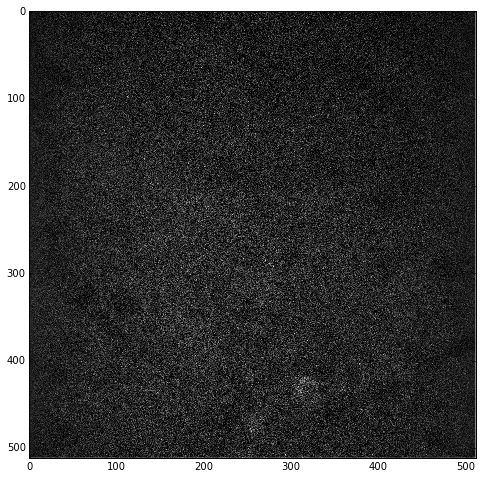

In [5]:
_ = plt.imshow(stack[0,:,:])

### Mean image

Now, we are going to look at a **mean image** of all frames:

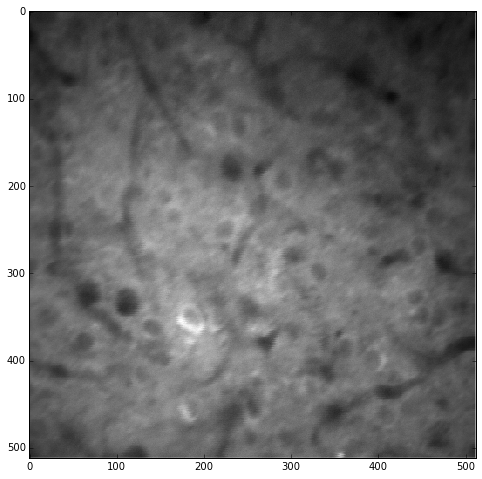

In [6]:
_ = plt.imshow(stack.mean(axis=0))

### Histogram

And a **histogram** of all pixel values:

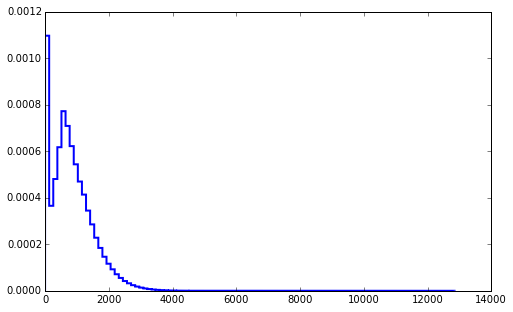

In [7]:
fig, ax = plt.subplots(figsize=(8,5))
_ = ax.hist(stack.flatten(), bins=100, normed=True, histtype='step', lw=2)

In [8]:
stack.max()

12843

#### On a sidenote: saving plots and more ..

In [9]:
fig.savefig('histogram.png')

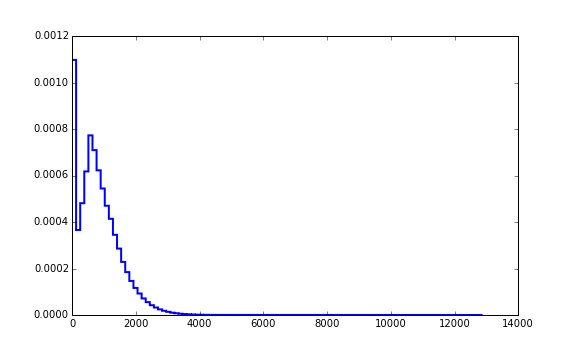

In [10]:
from IPython.display import Image
Image('histogram.png')

### Average image brigthness over time

In [11]:
flatframes = stack.reshape((stack.shape[0], stack.shape[1]*stack.shape[2]))
meanperframe = flatframes.mean(axis=1)

In [12]:
import os
stackdir, _ = os.path.split(testimage)
os.listdir(stackdir)

['ChanA_0001_0001_0001.tif',
 'ChanA_0001_0001_0001.tif.hdf5',
 'ChanB_0001_0001_0001.tif',
 'timing.txt',
 'ChanB_0001_0001_0001.tif.hdf5']

In [13]:
with open(os.path.join(stackdir, 'timing.txt')) as fid:
    lines = fid.readlines()

In [15]:
time = np.array([float(el.replace('\r\n', '')) for el in lines])
time

array([  0.00000000e+00,   1.09072000e-01,   2.12302000e-01, ...,
         3.08751000e+02,   3.08863000e+02,   3.08955000e+02])

In [16]:
fig, ax = plt.subplots(figsize=(12,5))
ax.plot(time, meanperframe)
#ax.set_ylabel('mean frame brightness')
ax.set_xlabel('time [s]')
ax.set_title('Mean brightness over time')
ax.set_xlim(0, time.max())
# use mpld3 to display the plot here, such that we are able to zoom!!
mpld3.display()

#### the actual sampling rate

In [17]:
len(time)/time.max()

9.7101519638782356